Imports

In [1]:
import numpy as np


#Initialization (__init__)

input_size: Number of features in the input data.
Weights: A vector of random values, one for each input feature.
Bias: A single random value that adjusts the decision boundary.

#Sigmoid Activation Function

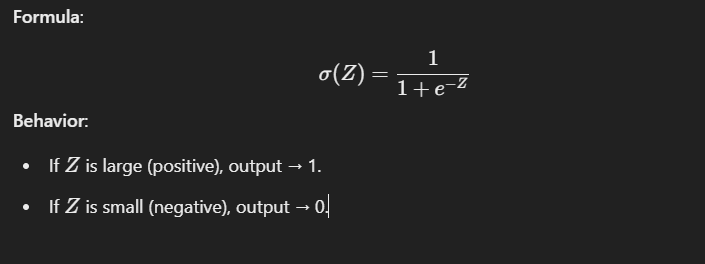

#Prediction Function

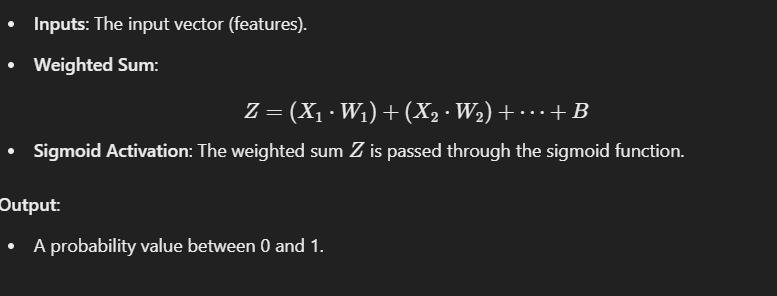

#Training the Model (fit Function)


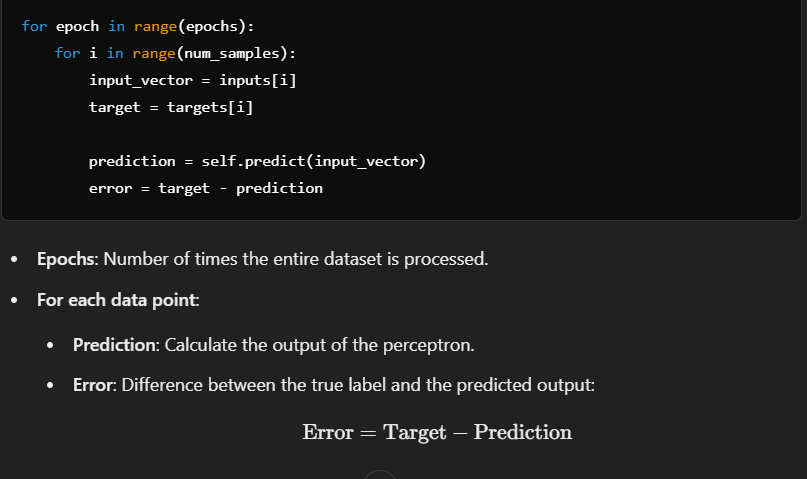

#Gradient Calculation

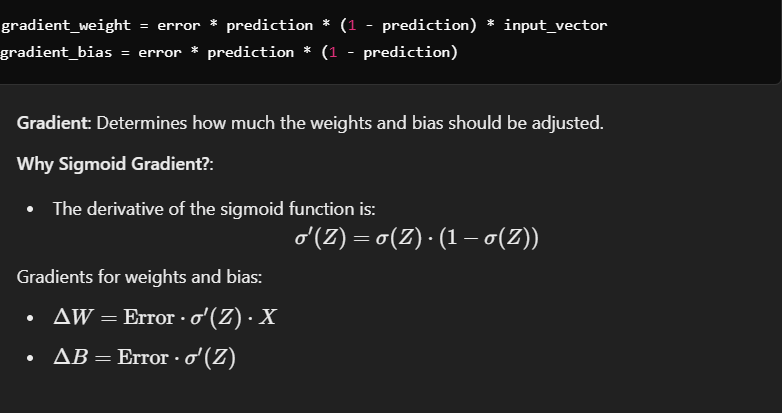

#Update Weights and Bias


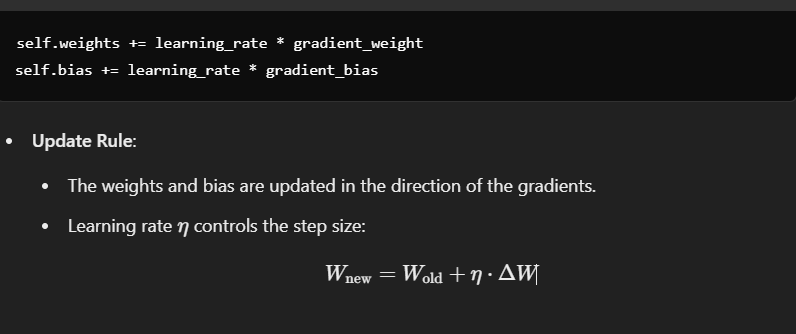

#Model Evaluation (evaluate Function)
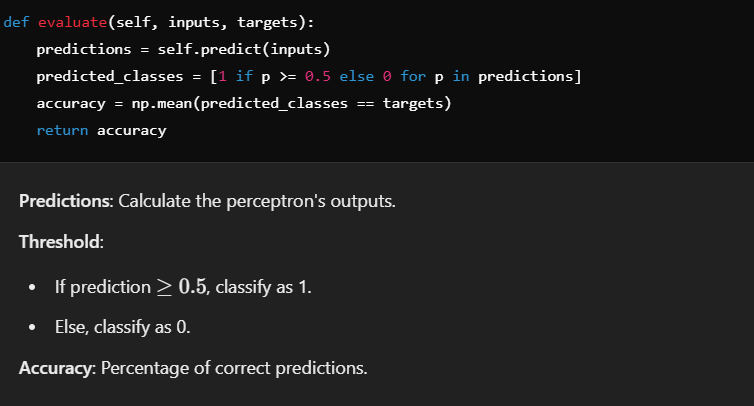

In [2]:
class SigmoidPerceptron:
    def __init__(self, input_size):
        """
        Initialize weights and bias with random values.
        :param input_size: Number of input features.
        """
        self.weights = np.random.randn(input_size)  # Random weights
        self.bias = np.random.randn(1)             # Random bias

    def sigmoid(self, z):
        """
        Sigmoid activation function.
        :param z: Weighted sum.
        :return: Sigmoid output.
        """
        return 1 / (1 + np.exp(-z))

    def predict(self, inputs):
        """
        Generate predictions for a given input.
        :param inputs: Input vector.
        :return: Predicted probability (0 to 1).
        """
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.sigmoid(weighted_sum)

    def fit(self, inputs, targets, learning_rate=0.01, epochs=1000):
        """
        Train the model using stochastic gradient descent.
        :param inputs: Training data (features).
        :param targets: True labels.
        :param learning_rate: Step size for weight updates.
        :param epochs: Number of training iterations.
        """
        num_samples = inputs.shape[0]

        for epoch in range(epochs):
            for i in range(num_samples):
                input_vector = inputs[i]
                target = targets[i]

                # Prediction
                prediction = self.predict(input_vector)
                error = target - prediction

                # Calculate gradients
                gradient_weight = error * prediction * (1 - prediction) * input_vector
                gradient_bias = error * prediction * (1 - prediction)

                # Update weights and bias
                self.weights += learning_rate * gradient_weight
                self.bias += learning_rate * gradient_bias

            if epoch % 100 == 0:
                loss = np.mean((targets - self.predict(inputs)) ** 2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def evaluate(self, inputs, targets):
        """
        Evaluate the model accuracy.
        :param inputs: Testing data.
        :param targets: True labels.
        :return: Accuracy of the model.
        """
        predictions = self.predict(inputs)
        predicted_classes = [1 if p >= 0.5 else 0 for p in predictions]
        accuracy = np.mean(predicted_classes == targets)
        return accuracy


# Example Usage


In [3]:
if __name__ == "__main__":
    # Generate a toy dataset (AND gate example)
    inputs = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1],
    ])
    targets = np.array([0, 0, 0, 1])  # AND logic

    # Initialize the perceptron
    model = SigmoidPerceptron(input_size=2)

    # Train the model
    print("Training the Sigmoid Perceptron...")
    model.fit(inputs, targets, learning_rate=0.1, epochs=1000)

    # Evaluate the model
    accuracy = model.evaluate(inputs, targets)
    print(f"Accuracy on training data: {accuracy * 100:.2f}%")

    # Test predictions
    for input_vector in inputs:
        prediction = model.predict(input_vector)
        predicted_class = 1 if prediction >= 0.5 else 0
        print(f"Input: {input_vector}, Prediction: {predicted_class}")

Training the Sigmoid Perceptron...
Epoch 0, Loss: 0.2523
Epoch 100, Loss: 0.1406
Epoch 200, Loss: 0.0953
Epoch 300, Loss: 0.0739
Epoch 400, Loss: 0.0613
Epoch 500, Loss: 0.0526
Epoch 600, Loss: 0.0460
Epoch 700, Loss: 0.0407
Epoch 800, Loss: 0.0364
Epoch 900, Loss: 0.0329
Accuracy on training data: 100.00%
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1
